# Example 2 - Time Domain Steady State Analysis

In [1]:
from CircuitCalculator.SimpleCircuit.styles.styling import select
select(style='DIN')
from CircuitCalculator.SimpleCircuit.Elements import Schematic, Resistor, Line, Ground, ACCurrentSource, Inductance
from CircuitCalculator.SimpleCircuit.DiagramTranslator import circuit_translator
from CircuitCalculator.SimpleCircuit.DiagramSolution import time_domain_steady_state_solution
from CircuitCalculator.SimpleAnalysis.TimeSeries import steady_state_voltage_timedomain_analysis, steady_state_current_timedomain_analysis, plot_timeseries_by_id
from CircuitCalculator.Circuit.solution import TimeDomainSolution

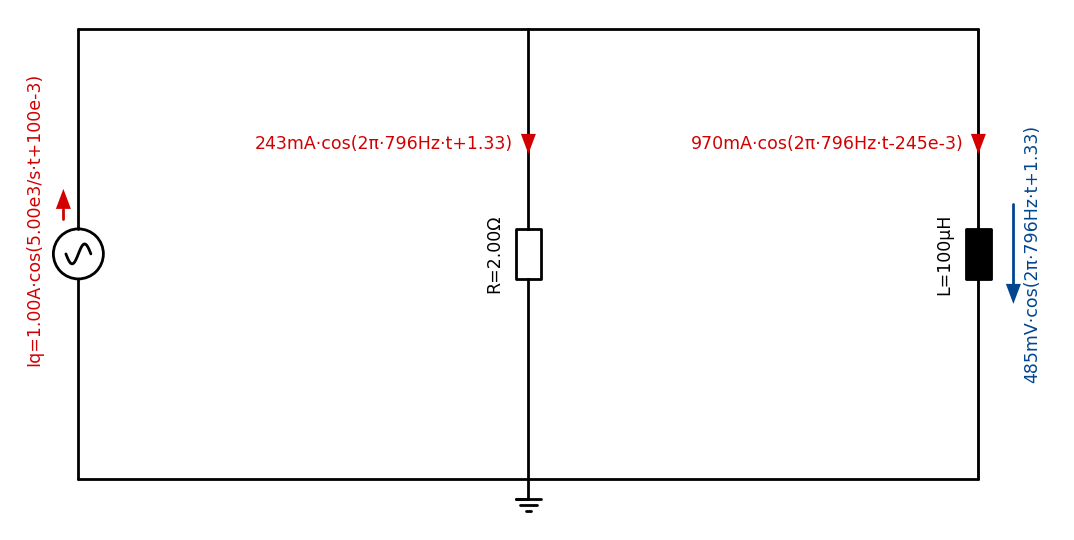

In [2]:
with Schematic(unit=9) as schematic:
    schematic += ACCurrentSource(I=1, w=5000, phi=0.1, name='Iq')
    schematic += (L1:=Line().right())
    schematic += Resistor(R=2, name='R').down()
    schematic += Line().left()
    schematic += Line().right().at(L1.end)
    schematic += Inductance(L=1e-4, name='L').down()
    schematic += Line().left()
    schematic += Ground()
    schematic_solution = time_domain_steady_state_solution(schematic, w=5000, sin=False, hertz=True)
    schematic += schematic_solution.draw_voltage('L')
    schematic += schematic_solution.draw_current('R')
    schematic += schematic_solution.draw_current('L')

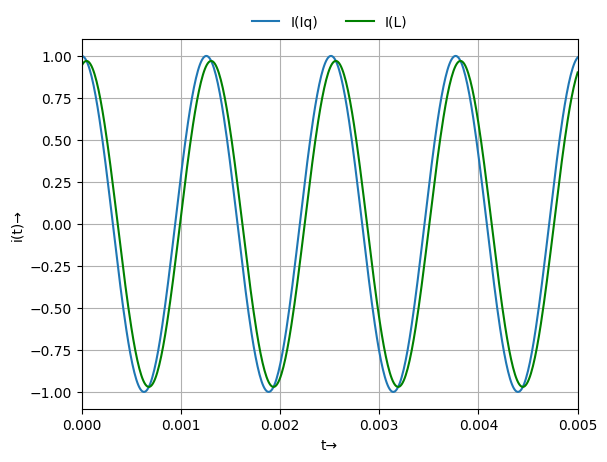

In [3]:
_ = steady_state_current_timedomain_analysis(
    plot_timeseries_by_id('Iq'),
    plot_timeseries_by_id('L', color='green'),
    solution=TimeDomainSolution(circuit_translator(schematic)),
    tmax=0.005
)

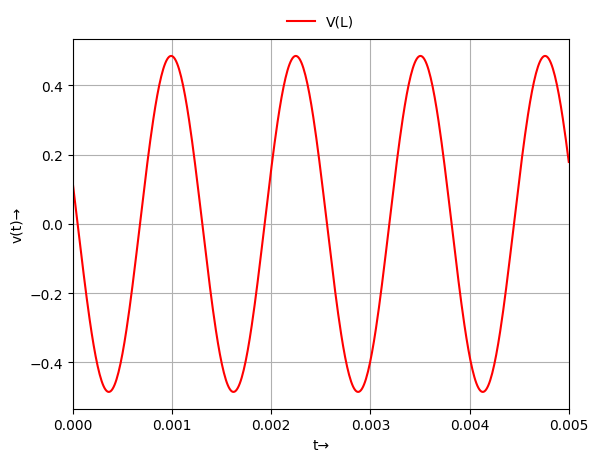

In [4]:
_ = steady_state_voltage_timedomain_analysis(
    plot_timeseries_by_id('L', color='red'),
    solution=TimeDomainSolution(circuit_translator(schematic)),
    tmax=0.005
)